In [1]:
from auxiliary.download_data import download_from_switch
download_from_switch(switch_path="/hydrometeo/Gletsch2020", local_file_path="../.cache/data/hydrometeo/Gletsch2020")
download_from_switch(switch_path="/hydrometeo/Gletsch2019", local_file_path="../.cache/data/hydrometeo/Gletsch2019");

Download files from remote directory /hydrometeo/Gletsch2020: 100%|█████████████████████████████████████████████| 1544/1544 [00:00<00:00, 8980.07it/s]
Download files from remote directory /hydrometeo/Gletsch2019: 100%|████████████████████████████████████████████| 2141/2141 [00:00<00:00, 11475.93it/s]


In [2]:
from auxiliary.read_gletsch_data import read_gletsch_csv_data
all_data_ar = read_gletsch_csv_data(hydro_mateo_path=r"../.cache/data/hydrometeo/Gletsch", years=["2019", "2020"], ar_selection=True, where="../.cache/interim/hydrometeo/gletsch_ar.parquet")
all_data_nar = read_gletsch_csv_data(hydro_mateo_path=r"../.cache/data/hydrometeo/Gletsch", years=["2019", "2020"], ar_selection=False, where="../.cache/interim/hydrometeo/gletsch_nar.parquet")

Read files of the year 2020: 100%|██████████| 772/772 [00:52<00:00, 14.83it/s]


In [3]:
from auxiliary.auxiliary import read_pyarrow_data
all_data_ar = read_pyarrow_data(where="../.cache/interim/hydrometeo/gletsch_ar.parquet")
all_data_nar = read_pyarrow_data(where="../.cache/interim/hydrometeo/gletsch_nar.parquet")

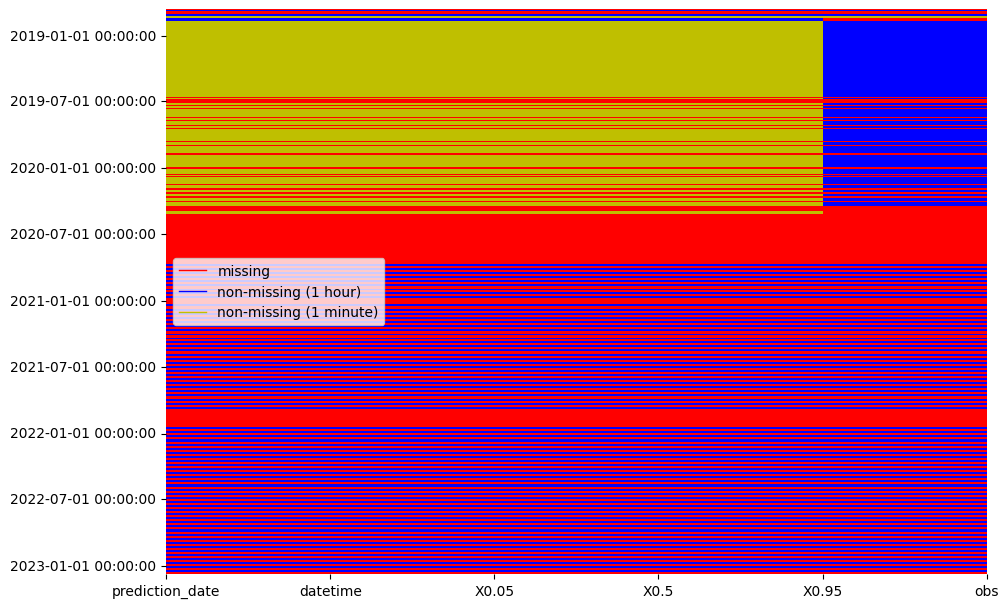

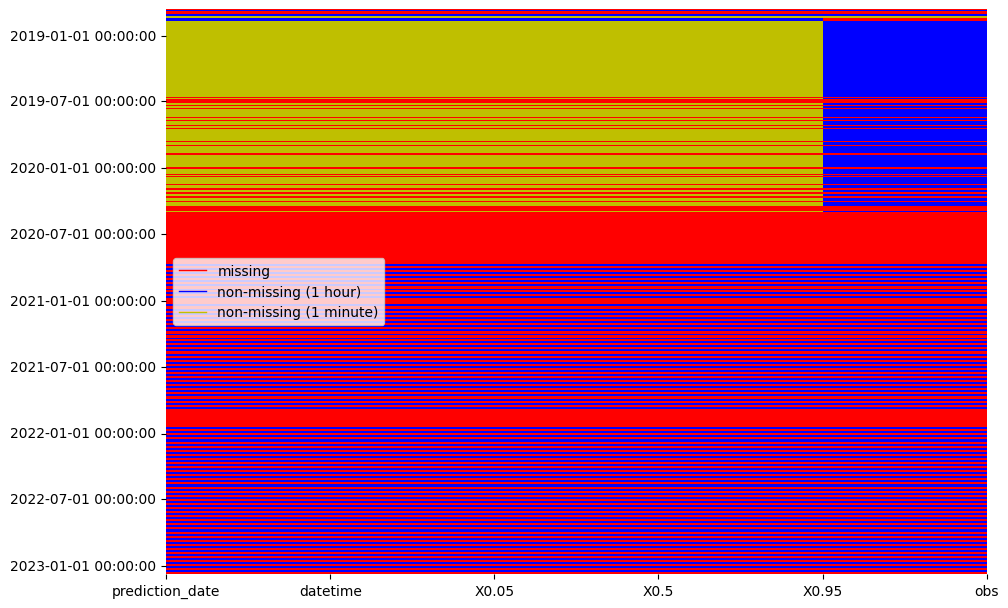

In [4]:
from pre_analyses.missing_gletsch_data import missing_matrix_gletsch
missing_matrix_gletsch(all_data_ar)
missing_matrix_gletsch(all_data_nar);

In [5]:
import polars as pl
import numpy as np

df = all_data_ar.with_columns(pl.col("prediction_date").dt.truncate(every="12h")).set_sorted("prediction_date", descending=False).unique(subset=["prediction_date", "datetime"], maintain_order=True, keep="last").groupby("prediction_date").agg(pl.all().drop_nulls()).upsample(time_column="prediction_date", every="12h").with_columns(pl.all().exclude(["prediction_date"]).fill_null([np.nan]))
df

prediction_date,datetime,X0.05,X0.5,X0.95,obs
datetime[μs],list[datetime[μs]],list[f64],list[f64],list[f64],list[f64]
2018-10-19 12:00:00,"[2018-10-19 18:00:00, 2018-10-19 19:00:00, … 2018-10-24 12:00:00]","[1.489574, 1.52628, … 0.498147]","[1.489645, 1.526342, … 0.573323]","[1.489784, 1.526425, … 0.743275]","[1.483, 1.494, … 0.868]"
2018-10-20 00:00:00,"[2018-10-20 06:00:00, 2018-10-20 07:00:00, … 2018-10-25 00:00:00]","[1.405184, 1.379795, … 0.493619]","[1.40529, 1.37991, … 0.692574]","[1.405422, 1.380004, … 2.818427]","[1.408, 1.383, … 1.426]"
2018-10-20 12:00:00,[null],[NaN],[NaN],[NaN],[NaN]
2018-10-21 00:00:00,[null],[NaN],[NaN],[NaN],[NaN]
2018-10-21 12:00:00,[null],[NaN],[NaN],[NaN],[NaN]
2018-10-22 00:00:00,[null],[NaN],[NaN],[NaN],[NaN]
2018-10-22 12:00:00,"[2018-10-22 18:00:00, 2018-10-22 19:00:00, … 2018-10-27 12:00:00]","[1.154335, 1.16718, … 0.670312]","[1.154398, 1.167292, … 0.738327]","[1.154478, 1.167448, … 0.856374]","[1.178, 1.21, … 0.923]"
2018-10-23 00:00:00,"[2018-10-23 06:00:00, 2018-10-23 07:00:00, … 2018-10-28 00:00:00]","[1.091247, 1.074502, … 0.561755]","[1.091253, 1.074561, … 0.747931]","[1.091256, 1.074727, … 0.946258]","[1.081, 1.036, … 0.865]"
2018-10-23 12:00:00,[null],[NaN],[NaN],[NaN],[NaN]
